In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
import os
import pandas as pd
from core.cega import clarke_error_grid

In [31]:
PATIENTS_2018 = ["559", "563", "570", "575", "588", "591"]
PATIENTS_2020 = ["540", "544", "552", "567", "584", "596"]

/home/laco/School/Bakalarka/Predicting-Blood-Glucose-Levels-with-LMU-RNNs/core/cega.py:59: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


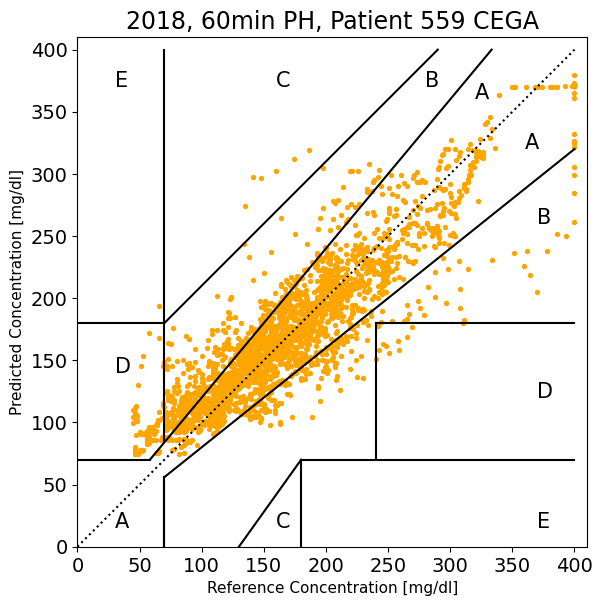

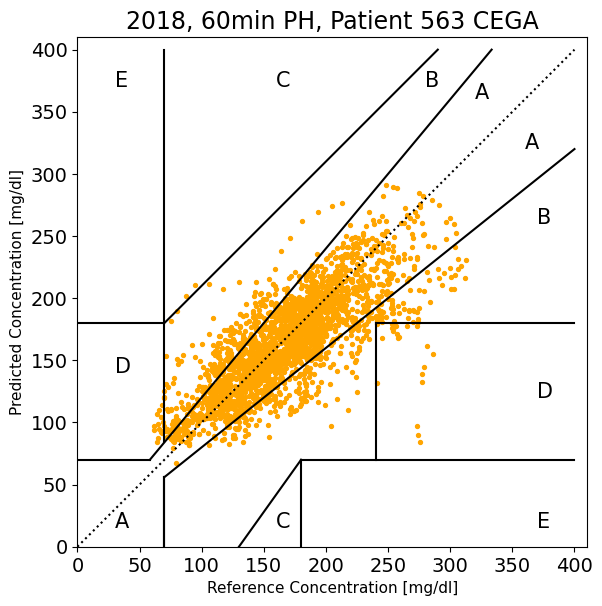

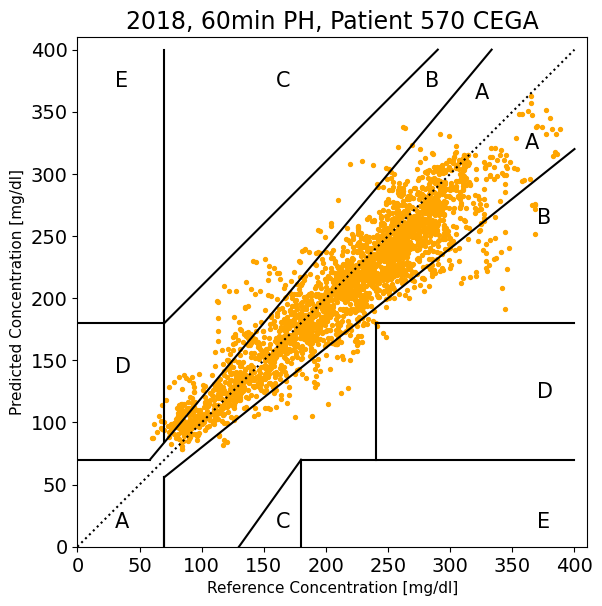

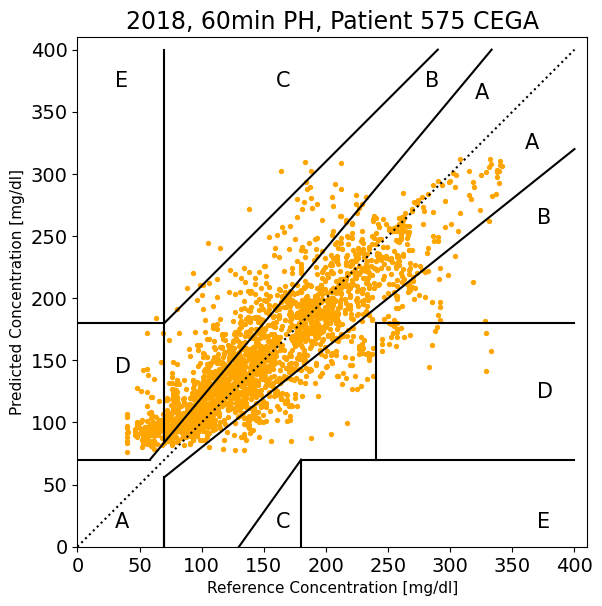

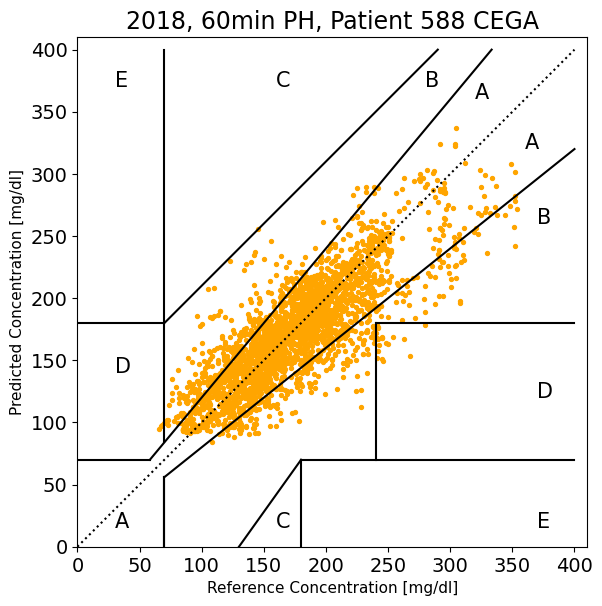

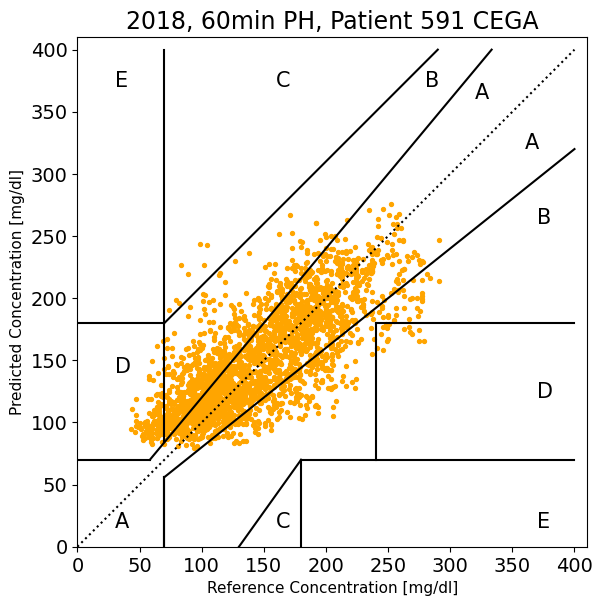

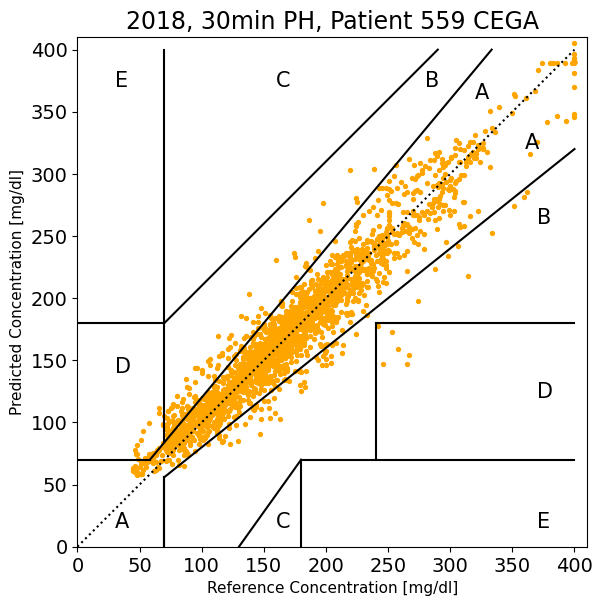

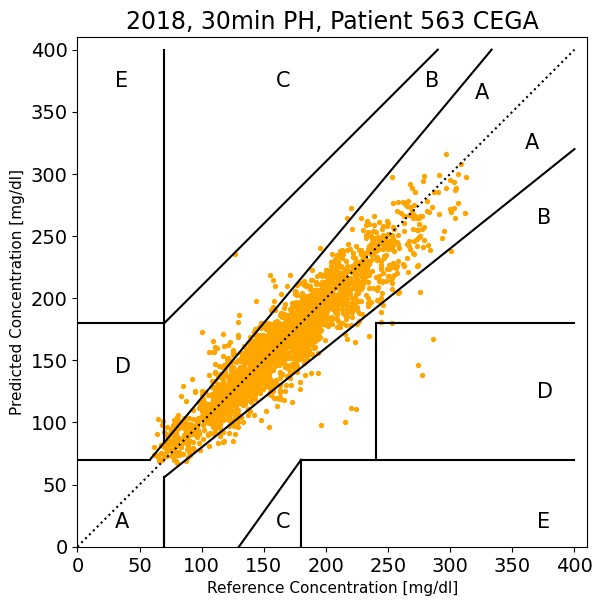

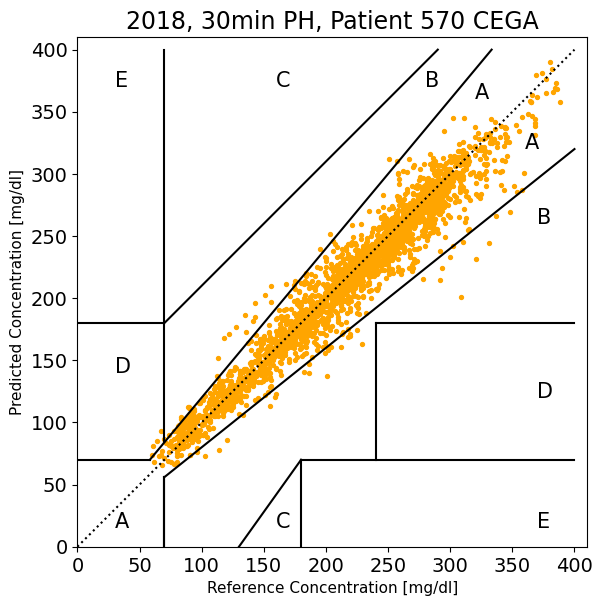

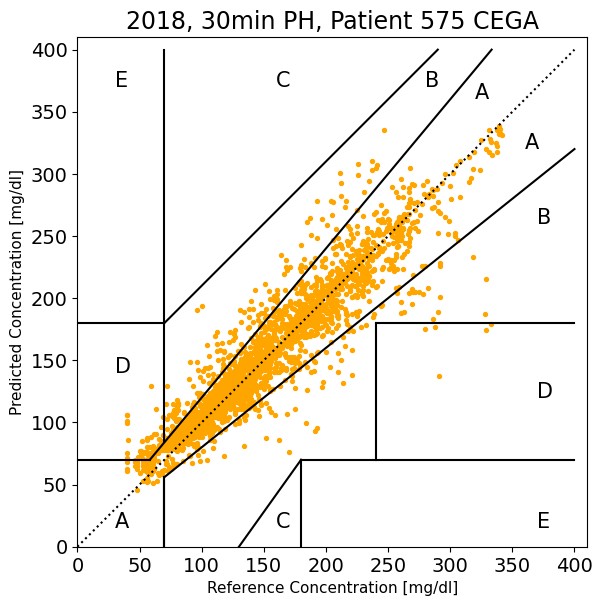

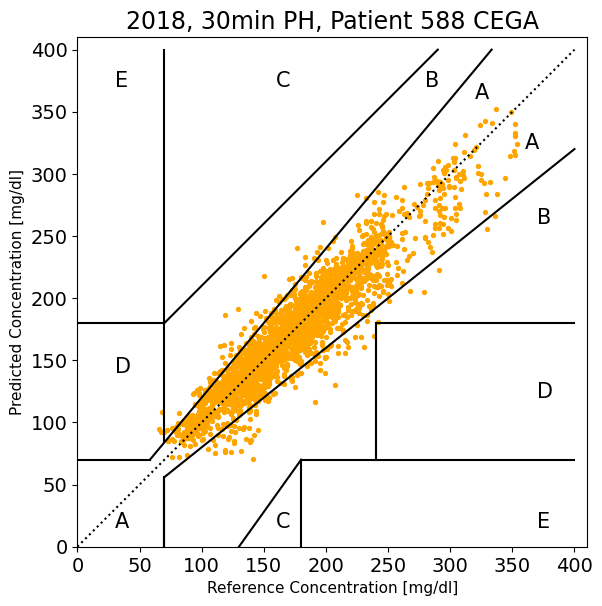

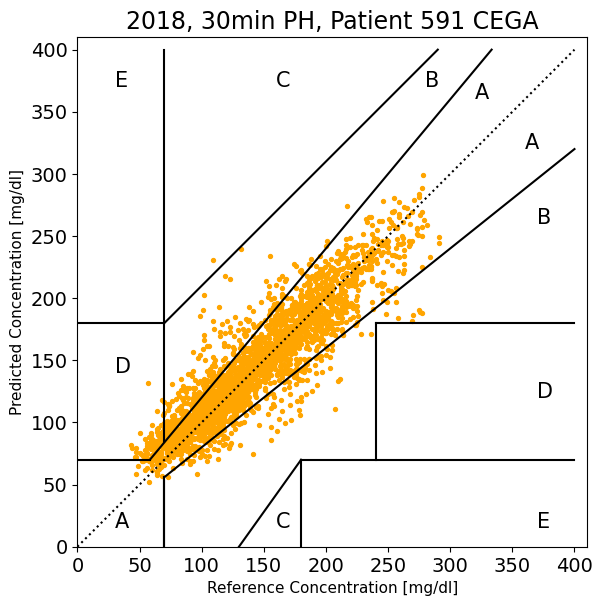

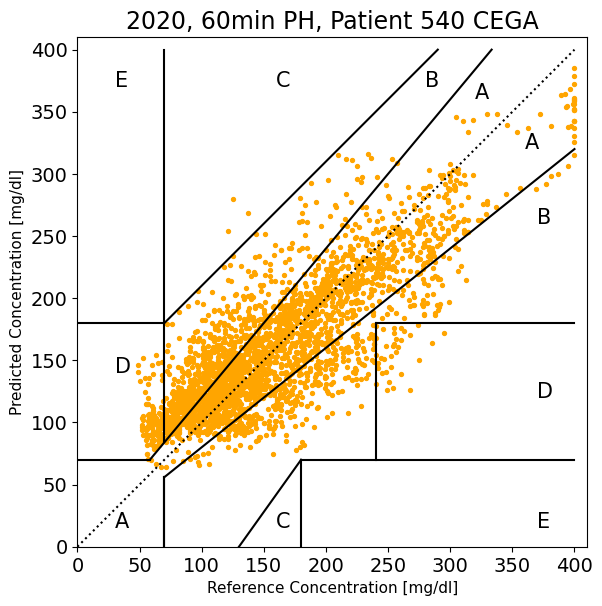

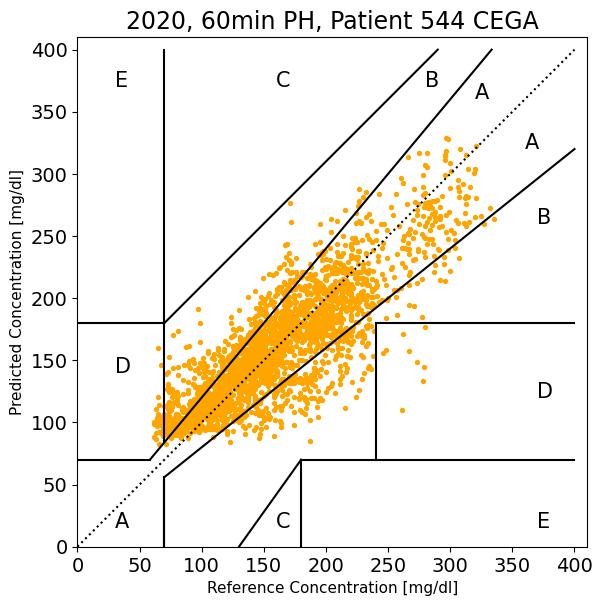

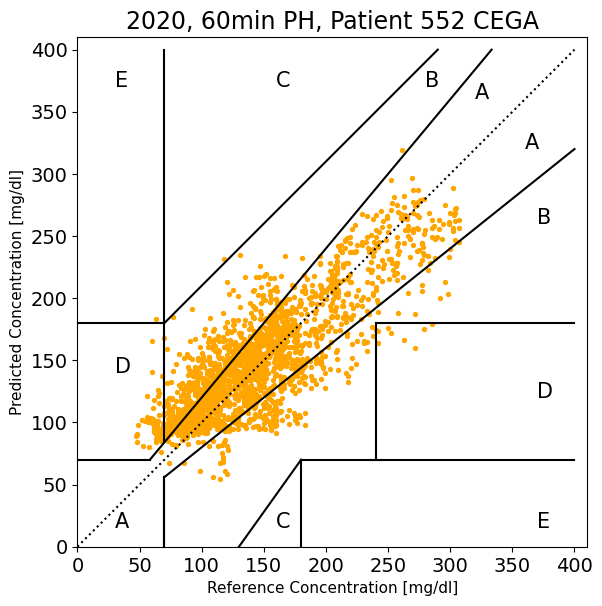

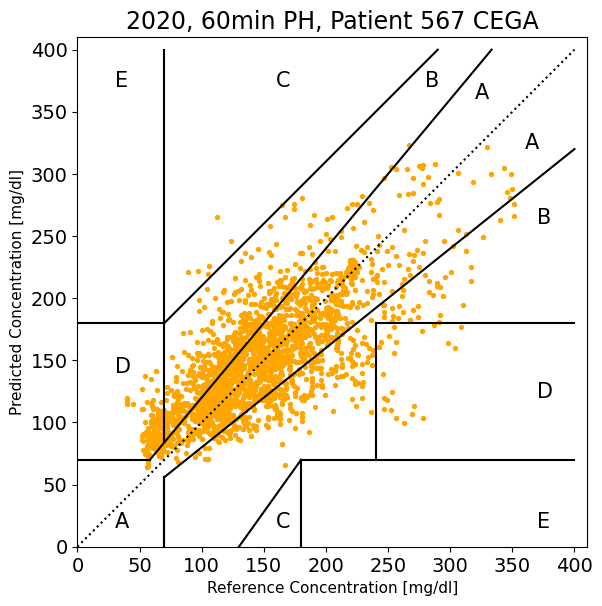

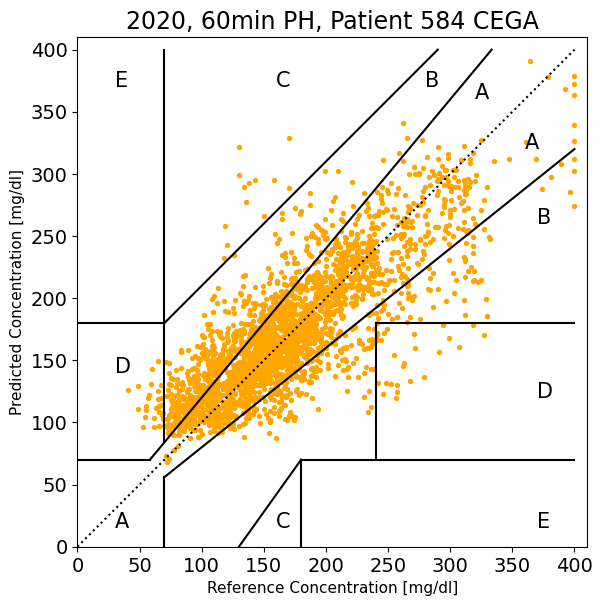

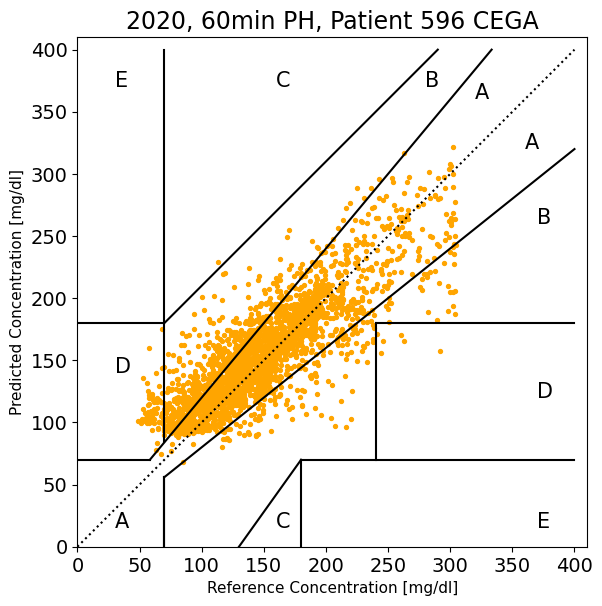

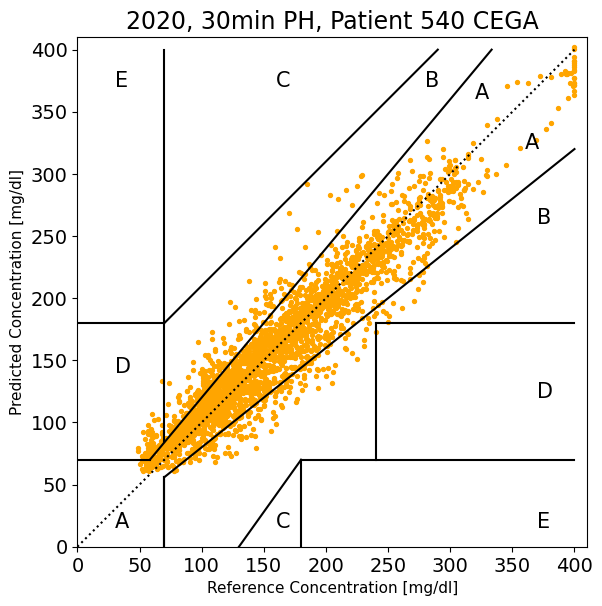

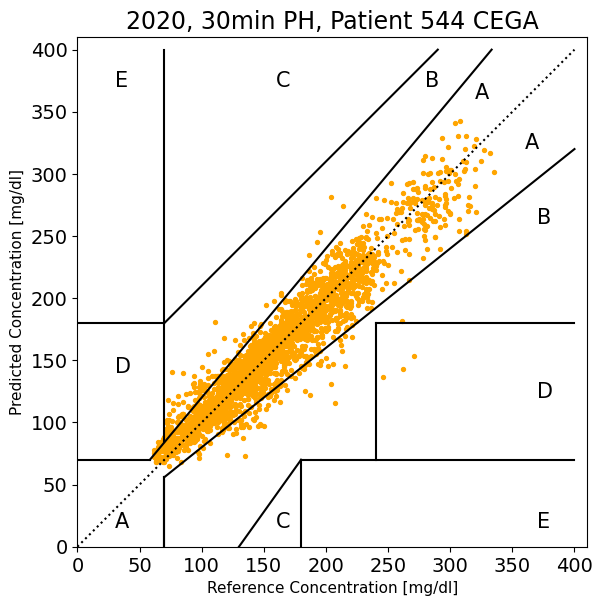

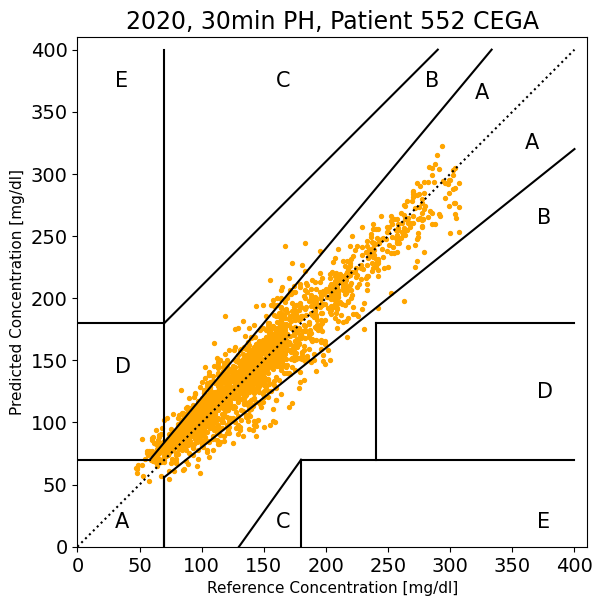

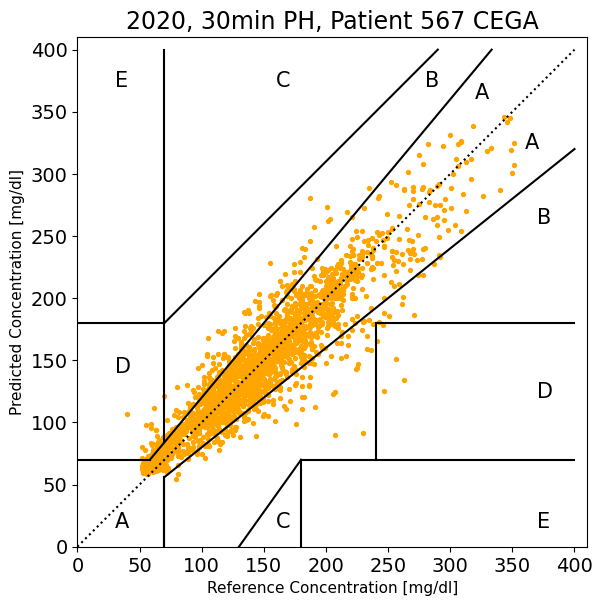

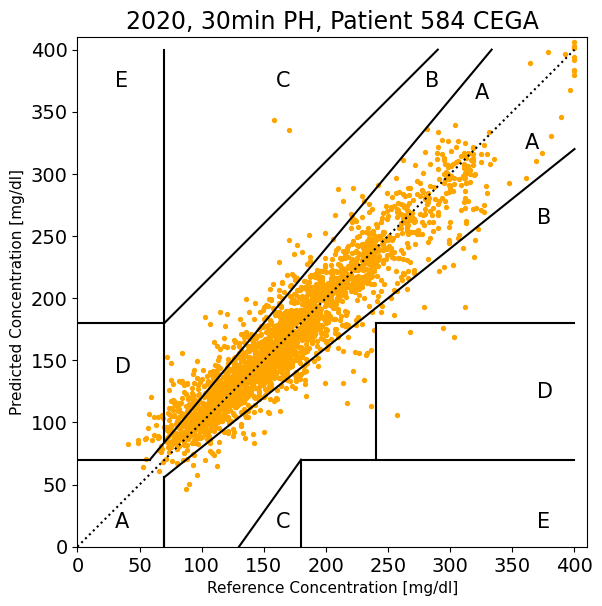

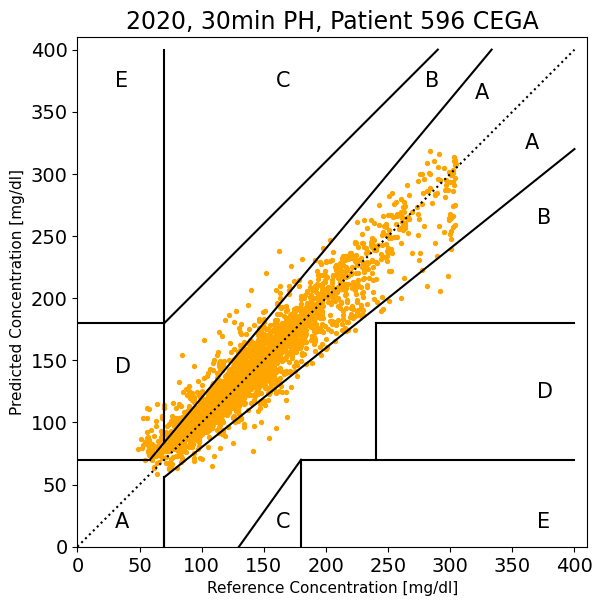

In [26]:
zone_percentages = []

for data in os.listdir("../../data/predictions"):
    df = pd.read_csv(f"../../data/predictions/{data}")
    dataset, ph = data.split("_")[:2]
    for patient in df["patient_id"].unique():
        patient_df = df[df["patient_id"] == patient].reset_index()
        fig, zones = clarke_error_grid(patient_df["target"], patient_df["prediction"], f"{dataset}, {ph} PH, Patient {patient}", save_file=f"../../plots/{dataset}_{ph}_{patient}.png")
        zone_percentages.append((patient, ph, zones))

In [27]:
zone_percentages

[(559,
  '60min',
  [0.7518427518427518,
   0.2113022113022113,
   0.002457002457002457,
   0.033988533988533985,
   0.0004095004095004095]),
 (563,
  '60min',
  [0.7929411764705883,
   0.19098039215686274,
   0.000784313725490196,
   0.015294117647058824,
   0.0]),
 (570,
  '60min',
  [0.8845726970033296, 0.11024787273399926, 0.0, 0.005179430262671106, 0.0]),
 (575,
  '60min',
  [0.6726703210649961,
   0.26076742364917777,
   0.003915426781519186,
   0.06225528582615505,
   0.00039154267815191856]),
 (588,
  '60min',
  [0.7968863142650253,
   0.1940622737146995,
   0.0003620564808110065,
   0.008689355539464157,
   0.0]),
 (591,
  '60min',
  [0.6212844036697248, 0.32, 0.0029357798165137615, 0.05577981651376147, 0.0]),
 (559,
  '30min',
  [0.9170024174053183, 0.07010475423045931, 0.0, 0.0128928283642224, 0.0]),
 (563,
  '30min',
  [0.9370847987495116, 0.05822586948026573, 0.0, 0.004689331770222743, 0.0]),
 (570,
  '30min',
  [0.9761642830949762, 0.022002200220022004, 0.0, 0.00183351668

In [35]:
# Create DataFrame
df = pd.DataFrame(zone_percentages, columns=['Patient ID', 'PH', 'Values'])
df[['Zone A', 'Zone B', 'Zone C', 'Zone D', 'Zone E']] = pd.DataFrame(df['Values'].tolist(), index=df.index)
df.drop('Values', axis=1, inplace=True)
df["cohort"] = df["Patient ID"].apply(lambda x: "2018" if str(x) in PATIENTS_2018 else "2020")
df

,Patient ID,PH,Zone A,Zone B,Zone C,Zone D,Zone E,cohort
0,559,60min,0.751843,0.211302,0.002457,0.033989,0.000410,2018
1,563,60min,0.792941,0.190980,0.000784,0.015294,0.000000,2018
2,570,60min,0.884573,0.110248,0.000000,0.005179,0.000000,2018
3,575,60min,0.672670,0.260767,0.003915,0.062255,0.000392,2018
4,588,60min,0.796886,0.194062,0.000362,0.008689,0.000000,2018
5,591,60min,0.621284,0.320000,0.002936,0.055780,0.000000,2018
6,559,30min,0.917002,0.070105,0.000000,0.012893,0.000000,2018
7,563,30min,0.937085,0.058226,0.000000,0.004689,0.000000,2018
8,570,30min,0.976164,0.022002,0.000000,0.001834,0.000000,2018
9,575,30min,0.874175,0.099806,0.000000,0.026019,0.000000,2018


In [36]:
df[df["cohort"] == "2018"]

,Patient ID,PH,Zone A,Zone B,Zone C,Zone D,Zone E,cohort
0,559,60min,0.751843,0.211302,0.002457,0.033989,0.000410,2018
1,563,60min,0.792941,0.190980,0.000784,0.015294,0.000000,2018
2,570,60min,0.884573,0.110248,0.000000,0.005179,0.000000,2018
3,575,60min,0.672670,0.260767,0.003915,0.062255,0.000392,2018
4,588,60min,0.796886,0.194062,0.000362,0.008689,0.000000,2018
5,591,60min,0.621284,0.320000,0.002936,0.055780,0.000000,2018
6,559,30min,0.917002,0.070105,0.000000,0.012893,0.000000,2018
7,563,30min,0.937085,0.058226,0.000000,0.004689,0.000000,2018
8,570,30min,0.976164,0.022002,0.000000,0.001834,0.000000,2018
9,575,30min,0.874175,0.099806,0.000000,0.026019,0.000000,2018


In [37]:
df[df["cohort"] == "2020"]

,Patient ID,PH,Zone A,Zone B,Zone C,Zone D,Zone E,cohort
12,540,60min,0.600558,0.340188,0.001046,0.058208,0.000000,2020
13,544,60min,0.740172,0.243729,0.000000,0.016099,0.000000,2020
14,552,60min,0.662892,0.302265,0.000436,0.033972,0.000436,2020
15,567,60min,0.595652,0.316522,0.003043,0.084783,0.000000,2020
16,584,60min,0.693216,0.281631,0.004954,0.020198,0.000000,2020
17,596,60min,0.733160,0.237067,0.000372,0.029401,0.000000,2020
18,540,30min,0.852482,0.124262,0.000000,0.023256,0.000000,2020
19,544,30min,0.926160,0.069017,0.000000,0.004824,0.000000,2020
20,552,30min,0.904803,0.083190,0.000000,0.012007,0.000000,2020
21,567,30min,0.868029,0.109408,0.000000,0.022563,0.000000,2020
